In [1]:
### From buoy data: plot T/S, compute sigma-t, compute MLD
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import math
import cftime
import sys
import seawater as sw
import re
# from metpy import calc
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)

depth= 0.0 m
[datetime.datetime(2023, 1, 1, 0, 5) datetime.datetime(2023, 1, 1, 0, 35)
 datetime.datetime(2023, 1, 1, 1, 5)] [1800. 1800. 1800.] secconds


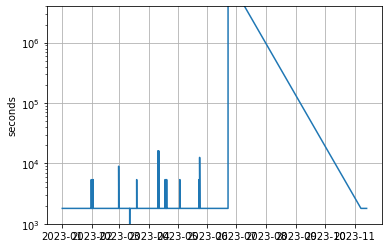

In [3]:
### buoy data info
year = '2023'
buoy_id = '42022'
path_data = '/Users/chi/Documents/Data/NDBC/'
fn_ocean = 'ocean_ndbc'+buoy_id+'_y'+year+'.txt'

### read ocean data
arrayOcn = np.genfromtxt(path_data+fn_ocean,skip_header=2)
arrayOcn[arrayOcn== 999] = np.nan
arrayOcn[arrayOcn== 99] = np.nan
### convert to datetime
dtime = []
for i in range( arrayOcn.shape[0] ):
    dtime.append( datetime.datetime(int(arrayOcn[i,0]),int(arrayOcn[i,1]),int(arrayOcn[i,2]),int(arrayOcn[i,3]),int(arrayOcn[i,4])) )
dtime = np.array( dtime )
OTMP = arrayOcn[:,6]
SAL = arrayOcn[:,8]
depth = arrayOcn[:,5]
print('depth=',np.nanmean(depth),'m')
### the time intervals between measurements
### buoy 42022 is every 30 minutes. 
timestamp = np.array( [dtime[i].timestamp() for i in range( len(dtime) )] )
print(dtime[0:3],np.diff(timestamp)[0:3],'secconds')
plt.semilogy( dtime[:-1], np.diff(timestamp) )
plt.ylim([1e3,4e6])
plt.ylabel('seconds')
plt.grid()

In [5]:
### compute sigma-t
sigmat = sw.eos80.pden(SAL,OTMP,depth,0)-1000

<Figure size 432x288 with 0 Axes>

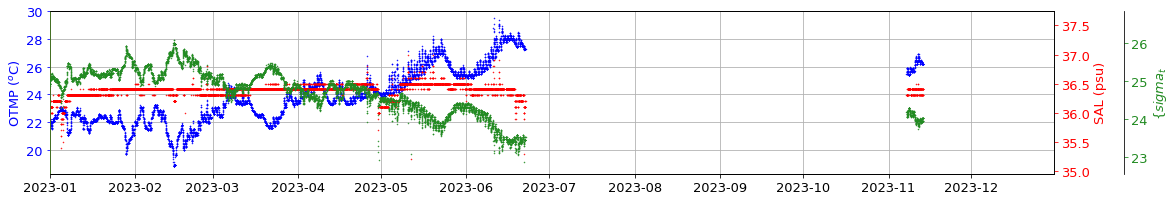

In [20]:
### plot T / S time series
nrow = 1
tlim_plot = [datetime.datetime(int(year),1,1), datetime.datetime(int(year),12,31)]
col = ['b','r','forestgreen']
###
plt.clf()
fig, host = plt.subplots(nrow,1)
plt.gcf().set_size_inches(18, 3)
plt.rcParams.update({'font.size': 13})
### plot OTMP 
plt.subplot(nrow,1,1)
plt.plot(dtime, OTMP,'.',ms=1,color=col[0])
plt.xlim(tlim_plot); plt.grid()
plt.ylabel('OTMP ($^o$C)')
### plot SAL
ax1 = host.twinx()
ax2 = host.twinx()
ystd = np.nanstd(SAL); ymn = np.nanmean(SAL)
ax1.plot(dtime, SAL,'.',ms=1,color=col[1])
ax1.set_ylim(ymn+[-3*ystd,3*ystd])
ax1.set_ylabel('SAL (psu)')
### plot sigma-t
ax2.spines['right'].set_position(('axes',1.07))
ax2.plot(dtime, sigmat,'.',ms=1,color=col[2])
ystd = np.nanstd(sigmat); ymn = np.nanmean(sigmat)
ax2.set_ylim(ymn+[-3*ystd,3*ystd])
ax2.set_ylabel('$\{sigma}$$_t$')

### color settings
for i in range( len(col) ):
    if i == 0:
        ax_str = 'host'
    else:
        ax_str = 'ax'+str(i); col_i = 'col[i]'
    exec(ax_str+'.yaxis.label.set_color('+col_i+')')
    exec(ax_str+'.tick_params(axis="y",colors='+col_i+')')
    exec(ax_str+'.spines["left"].set_edgecolor('+col_i+')')

### save figure
plt.savefig('timeseries_TSSigmat('+str(int(np.nanmean(depth)))+'m)_ncbc-'+buoy_id+'_'+tlim_plot[0].strftime('%Y%m%d-')+tlim_plot[1].strftime('%m%d')\
            +'.pdf',dpi=300,bbox_inches='tight')